In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
from scipy.stats import pearsonr

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
df =pd.read_csv(r"/content/drive/MyDrive/Computer Vision /w/Project /Intrenship/DataSets/crime_safety_dataset.csv")
df.sample(5)

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
736,737,2021-10-28,20:55:27,Arson,Dallas,TX,1957 Oak St,79,Non-binary,Other
600,601,2020-08-18,09:02:10,Assault,New York,NY,5042 Maple Ave,14,Female,Asian
49,50,2022-05-22,23:53:37,Drug Offense,Chicago,IL,424 Main St,41,Non-binary,Asian
586,587,2022-11-24,05:28:41,Arson,San Jose,CA,2555 Maple Ave,80,Male,Other
561,562,2024-11-04,16:16:07,Theft,San Antonio,TX,9955 Pine St,35,Non-binary,White


In [85]:
# Define the mapping
crime_type_map = {
    'Domestic Violence': 0,
    'Burglary': 1,
    'Robbery': 2,
    'Homicide': 3,
    'Arson': 4,
    'Assault': 5,
    'Vandalism': 6,
    'Fraud': 7,
    'Drug Offense': 8,
    'Theft': 10
}

# Apply the mapping
df['crime_type'] = df['crime_type'].map(crime_type_map)

# Check the result
print(df['crime_type'].unique())


[ 3  5  1  6  7  8  0  4 10  2]


In [86]:
print(df['crime_type'].value_counts())

crime_type
0     121
1     121
2     101
3     101
4      98
5      97
6      94
7      89
8      89
10     89
Name: count, dtype: int64


In [87]:
# Define the mapping
city_map = {
    'Dallas': 0,
    'Houston': 1,
    'New York': 2,
    'Los Angeles': 3,
    'Chicago': 4,
    'Philadelphia': 5,
    'Phoenix': 6,
    'San Jose': 7,
    'San Antonio': 8,
    'San Diego': 9
}

# Apply the mapping
df['city'] = df['city'].map(city_map)

# Check result
print(df['city'].unique())


[5 6 8 4 1 9 2 0 3 7]


In [88]:
# Define the state mapping
state_map = {
    'TX': 0,
    'CA': 1,
    'NY': 2,
    'IL': 3,
    'PA': 4,
    'AZ': 5
}

# Apply the mapping
df['state'] = df['state'].map(state_map)

# Check result
print(df['state'].unique())


[4 5 0 3 1 2]


In [89]:
# Define the gender mapping
gender_map = {
    'Male': 1,
    'Female': 0,
    'Other': 2,
    'Non-binary': 3
}

# Apply the mapping (replace 'victim_gender' with actual column name if different)
df['victim_gender'] = df['victim_gender'].map(gender_map)

# Check result
print(df['victim_gender'].unique())


[1 0 2 3]


In [90]:
# Define the race mapping
race_map = {
    'Black': 0,
    'White': 1,
    'Asian': 2,
    'Hispanic': 3,
    'Other': 4
}

# Apply the mapping
df['victim_race'] = df['victim_race'].map(race_map)

# Check result
print(df['victim_race'].unique())


[4 0 2 1 3]


In [91]:
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,3,5,4,9916 Broadway,34,1,4
1,2,2022-07-10,12:10:59,5,6,5,6853 Oak St,13,0,0
2,3,2024-12-31,09:26:12,1,8,0,3760 Maple Ave,23,1,2
3,4,2024-04-12,23:17:28,6,5,4,6781 Main St,36,2,2
4,5,2023-07-19,04:49:39,7,8,0,3239 Broadway,26,2,4


In [92]:
# 1. Basic inspection
print(df.shape)

(1000, 10)


In [93]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   int64 
 4   city                  1000 non-null   int64 
 5   state                 1000 non-null   int64 
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   int64 
 9   victim_race           1000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 78.3+ KB
None


In [94]:
print(df.head())

   id        date      time  crime_type  city  state location_description  \
0   1  2022-09-09  18:58:57           3     5      4        9916 Broadway   
1   2  2022-07-10  12:10:59           5     6      5          6853 Oak St   
2   3  2024-12-31  09:26:12           1     8      0       3760 Maple Ave   
3   4  2024-04-12  23:17:28           6     5      4         6781 Main St   
4   5  2023-07-19  04:49:39           7     8      0        3239 Broadway   

   victim_age  victim_gender  victim_race  
0          34              1            4  
1          13              0            0  
2          23              1            2  
3          36              2            2  
4          26              2            4  


In [95]:
print(df.isnull().sum())

id                      0
date                    0
time                    0
crime_type              0
city                    0
state                   0
location_description    0
victim_age              0
victim_gender           0
victim_race             0
dtype: int64


In [96]:
# 2. Drop duplicates if any
df.drop_duplicates(inplace=True)

In [97]:
print(df.columns.tolist())

['id', 'date', 'time', 'crime_type', 'city', 'state', 'location_description', 'victim_age', 'victim_gender', 'victim_race']


In [98]:
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,3,5,4,9916 Broadway,34,1,4
1,2,2022-07-10,12:10:59,5,6,5,6853 Oak St,13,0,0
2,3,2024-12-31,09:26:12,1,8,0,3760 Maple Ave,23,1,2
3,4,2024-04-12,23:17:28,6,5,4,6781 Main St,36,2,2
4,5,2023-07-19,04:49:39,7,8,0,3239 Broadway,26,2,4


In [99]:
# Filter only Robbery cases
robbery_df = df[df['crime_type'] == 2]  # 2 is the mapped value for Robbery

# Count how many Robbery cases in each state
robbery_counts = robbery_df['state'].value_counts().sort_values(ascending=False)

# Show which state had the most robberies
print("Robbery count per state:")
print(robbery_counts)

# Optional: map state code back to name
state_code_map = {v: k for k, v in state_map.items()}
robbery_counts_named = robbery_counts.rename(index=state_code_map)

print("\nTop state for Robbery:")
print(robbery_counts_named)


Robbery count per state:
state
0    34
1    28
5    13
2    11
3    10
4     5
Name: count, dtype: int64

Top state for Robbery:
state
TX    34
CA    28
AZ    13
NY    11
IL    10
PA     5
Name: count, dtype: int64


In [101]:
import pandas as pd

# Assume df is your cleaned DataFrame

# Step 1: Mapping for state codes
state_map = {
    'TX': 0,
    'CA': 1,
    'NY': 2,
    'IL': 3,
    'PA': 4,
    'AZ': 5
}

# Reverse map to convert code to name
state_code_map = {v: k for k, v in state_map.items()}

# Step 2: Filter only 'Robbery' cases (crime_type = 2)
robbery_df = df[df['crime_type'] == 2]

# Step 3: Count robberies per state (code)
robbery_counts = robbery_df['state'].value_counts().sort_index()

# Step 4: Prediction Setup
growth_rate = 0.05  # 5% annual growth
start_year = 2025
end_year = 2030

prediction_data = []

for state_code, base_count in robbery_counts.items():
    for year in range(start_year, end_year + 1):
        years_ahead = year - start_year
        predicted_count = base_count * ((1 + growth_rate) ** years_ahead)
        prediction_data.append({
            'state_code': state_code,
            'state_name': state_code_map.get(state_code, 'Unknown'),
            'year': year,
            'predicted_robbery_count': round(predicted_count, 2)
        })

# Step 5: Create and display DataFrame
pred_df = pd.DataFrame(prediction_data)
print(pred_df)

# Optional: Save to CSV
# pred_df.to_csv("robbery_prediction_2025_2030.csv", index=False)


    state_code state_name  year  predicted_robbery_count
0            0         TX  2025                    34.00
1            0         TX  2026                    35.70
2            0         TX  2027                    37.48
3            0         TX  2028                    39.36
4            0         TX  2029                    41.33
5            0         TX  2030                    43.39
6            1         CA  2025                    28.00
7            1         CA  2026                    29.40
8            1         CA  2027                    30.87
9            1         CA  2028                    32.41
10           1         CA  2029                    34.03
11           1         CA  2030                    35.74
12           2         NY  2025                    11.00
13           2         NY  2026                    11.55
14           2         NY  2027                    12.13
15           2         NY  2028                    12.73
16           2         NY  2029

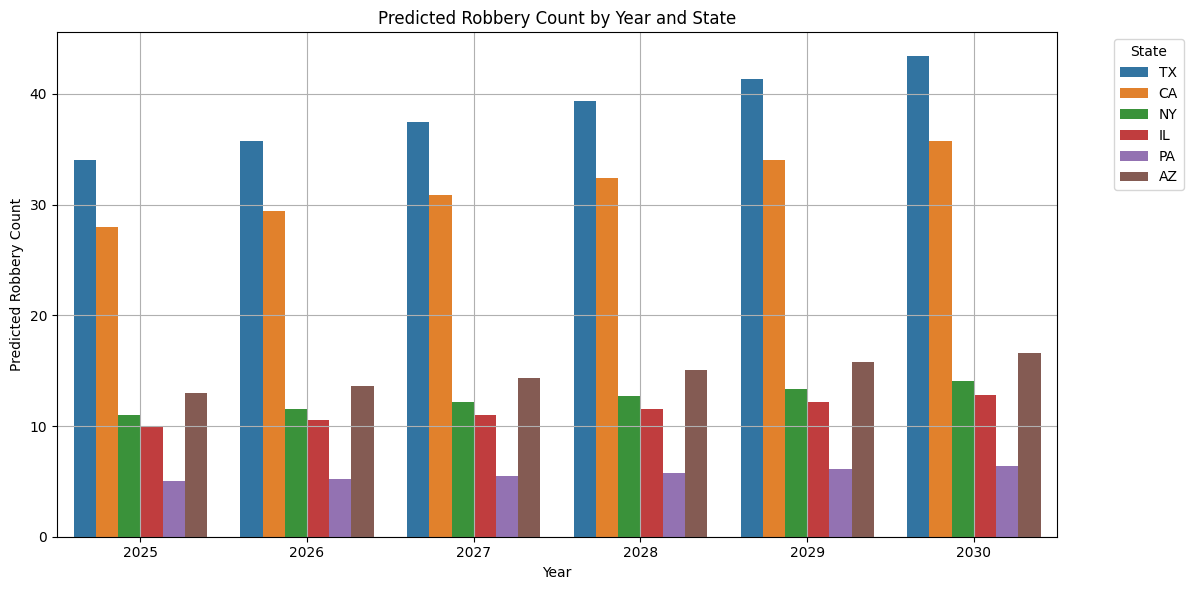

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure pred_df is already created
# Columns: ['state_code', 'state_name', 'year', 'predicted_robbery_count']

plt.figure(figsize=(12, 6))
sns.barplot(data=pred_df, x='year', y='predicted_robbery_count', hue='state_name')

plt.title('Predicted Robbery Count by Year and State')
plt.xlabel('Year')
plt.ylabel('Predicted Robbery Count')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


## Task 1: Crime Type Classification